## 환율 데이터 처리하기

In [203]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# csv 파일 가져오기
exchange_df = pd.read_csv('../public/kor_exchange.csv')

# 데이터가 반전된 것을 확인함
exchange_df.head()

,Unnamed: 0,Unnamed: 1,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,원/달러,환율,316.7,373.3,398.9,397.5,484.0,484.0,484.0,484.0,...,"1,099.3","1,172.5","1,207.7","1,070.5","1,115.7","1,156.4","1,086.3","1,188.8","1,264.5","1,288.0"
1,NaN,절상율(%),-3.9,-15.2,-6.4,0.4,-17.9,0.0,0.0,0.0,...,-4.0,-6.2,-2.9,12.8,8.2,-3.5,6.5,-8.6,-6.0,-1.8
2,엔/달러,환율,357.7,314.8,302.0,280.0,301.0,305.2,292.8,240.0,...,120.4,120.4,116.6,112.8,110.6,109.1,103.3,115.1,133.7,141.2
3,NaN,절상율(%),0.0,13.6,4.2,7.9,-7.0,-1.4,4.2,22.0,...,-12.5,0.0,3.2,3.4,2.0,1.3,5.6,-10.2,-13.9,-5.3
4,원/100엔,환율,88.5,118.6,132.1,142.0,160.8,158.6,165.3,201.7,...,913.0,974.1,"1,035.4",949.3,"1,008.9","1,059.8","1,051.2","1,032.5",945.6,912.3


In [204]:
# 첫 번째 열을 'Date'로 이름 변경
exchange_df.columns = ['dummy', '속성'] + [str(year) for year in range(1970, 2024)]

# 속성이라는 인덱스 지정 후 데이터 행 열 반전
df_transposed = exchange_df.set_index('속성').transpose()

# 인덱스 명 변경 -> 속성 to 연도
df_transposed.rename_axis('연도', inplace=True)

# 컬럼 이름 재지정
df_transposed.columns = ['미국환율', '미국 절산율', '일본환율', '일본 절산율', '중국환율', '중국 절산율']

# inplace: 기존 데이터에 영향 주기
df_transposed.drop('dummy', axis=0, inplace=True)

# 컬럼 가져와서 모두 다 숫자형으로 변경
for key in df_transposed.columns:
    # regex: 정규표현식
    # replace 는 문자열 치환
    # astype 타입 변경
    # 환율의 object 자료형을 float 으로 변경 
    df_transposed[key] = df_transposed[key].replace({',': ''}, regex=True).astype(float)

# 10개의 대표 데이터 가져오기
df_transposed.head(10)

,미국환율,미국 절산율,일본환율,일본 절산율,중국환율,중국 절산율
연도,,,,,,
1970,316.7,-3.9,357.7,0.0,88.5,-3.9
1971,373.3,-15.2,314.8,13.6,118.6,-25.3
1972,398.9,-6.4,302.0,4.2,132.1,-10.2
1973,397.5,0.4,280.0,7.9,142.0,-7.0
1974,484.0,-17.9,301.0,-7.0,160.8,-11.7
1975,484.0,0.0,305.2,-1.4,158.6,1.4
1976,484.0,0.0,292.8,4.2,165.3,-4.0
1977,484.0,0.0,240.0,22.0,201.7,-18.0
1978,484.0,0.0,194.6,23.3,248.7,-18.9


In [205]:
# 결측치 확인 -> 빈 데이터 없음
df_transposed.isnull().sum()

# 데이터 타입 확인 모두 float 타입
print(df_transposed.dtypes)

미국환율      float64
미국 절산율    float64
일본환율      float64
일본 절산율    float64
중국환율      float64
중국 절산율    float64
dtype: object


## 소비자 물가 지수 처리하기

In [206]:
# csv 파일 가져오기
cpi_df = pd.read_csv('../public/cpi.csv')

# 행 열을 돌려 반전시킨다
cpi_df = cpi_df.transpose()

# 필요없는 컬럼 삭제 -> 물가지수, 상승률만 남기기
for i in range(2, len(cpi_df.columns)):
    del cpi_df[i]

# 행렬 반전시 이상해지는 데이터 지우기
cpi_df = cpi_df.drop('단위:', axis=0)
cpi_df = cpi_df.drop('2020=100, %', axis=0)

# 컬럼 이름 지정하기
cpi_df.columns = ['소비자물가지수', '소비자물가상승률']

# 컬럼 인덱스 이름 변경하기
# 처리한 환율 DataFrame 과 같은 인덱스 이름을 지정해줌
cpi_df.rename_axis("연도", inplace=True)

# 컬럼을 가져와서 숫자형으로 변환하는 반복문
for key in cpi_df.columns:
    # 쉼표를 지우기 
    # 데이터 타입을 float(숫자형)으로 변경하기
    cpi_df[key] = cpi_df[key].astype(float)

# 대푯값 10개 가져오기
cpi_df

,소비자물가지수,소비자물가상승률
연도,,
1970,5.3,13.5
1971,5.9,11.7
1972,6.1,3.2
1973,7.6,24.3
1974,9.5,25.2
1975,10.9,15.3
1976,12.0,10.1
1977,13.8,14.5
1978,16.3,18.3


In [207]:
# 데이터의 결측치 확인
cpi_df.isnull().sum()

소비자물가지수     1
소비자물가상승률    1
dtype: int64

# 결측치 결과
결측치를 확인하니, 소비자 물가지수, 소비자 물가 상승률에 1개씩 결측값이 존재하는걸 확인함

# 해결방안
소비자 물가지수, 상승률에만 결측값이 존재한다.
 -> 특정 날짜에 데이터 측정 결과가 포함되지 않았다는것을 인지함.

따라서, dropna axis=0 을 통해 열이 아닌 행만 지우기로 함. (해당 열 물가 지수, 상승률은 꼭 필요한 데이터이기 때문)

In [208]:
cpi_df.dropna(axis=0, inplace=True)

cpi_df

,소비자물가지수,소비자물가상승률
연도,,
1970,5.3,13.5
1971,5.9,11.7
1972,6.1,3.2
1973,7.6,24.3
1974,9.5,25.2
1975,10.9,15.3
1976,12.0,10.1
1977,13.8,14.5
1978,16.3,18.3


In [209]:
# 두개의 데이터 프레임을 열 기준으로 병합
result_df = pd.concat([cpi_df, df_transposed], axis=1)

# 결측치 확인
result_df.isnull().sum()

소비자물가지수     1
소비자물가상승률    1
미국환율        0
미국 절산율      0
일본환율        0
일본 절산율      0
중국환율        0
중국 절산율      0
dtype: int64

In [210]:
# None 이 포함된 행 지우기
result_df.dropna(axis=0, inplace=True)

# 잘 지워졌는지 결측치 확인
result_df.isnull().sum()

소비자물가지수     0
소비자물가상승률    0
미국환율        0
미국 절산율      0
일본환율        0
일본 절산율      0
중국환율        0
중국 절산율      0
dtype: int64

In [239]:
result_df # 그래프 확인용 출력문

,소비자물가지수,소비자물가상승률,미국환율,미국 절산율,일본환율,일본 절산율,중국환율,중국 절산율
연도,,,,,,,,
1970,5.3,13.5,316.7,-3.9,357.7,0.0,88.5,-3.9
1971,5.9,11.7,373.3,-15.2,314.8,13.6,118.6,-25.3
1972,6.1,3.2,398.9,-6.4,302.0,4.2,132.1,-10.2
1973,7.6,24.3,397.5,0.4,280.0,7.9,142.0,-7.0
1974,9.5,25.2,484.0,-17.9,301.0,-7.0,160.8,-11.7
1975,10.9,15.3,484.0,0.0,305.2,-1.4,158.6,1.4
1976,12.0,10.1,484.0,0.0,292.8,4.2,165.3,-4.0
1977,13.8,14.5,484.0,0.0,240.0,22.0,201.7,-18.0
1978,16.3,18.3,484.0,0.0,194.6,23.3,248.7,-18.9


## 선형회귀 선택 이유
- 선형회귀는 적은 데이터로도 예측을 하기 쉽다.
- 환율과 cpi 지수가 우상향이기에 선형관계가 있다고 **가정**함.
- 선형회귀를 통해 환율과 cpi 지수를 **상관성**이 있는지 확인하기 위해서.
+ +일본은 우하향으로 선형관계가 없다고 판단하여 독립변수 데이터에 추가하지 않도록 함


In [240]:
# x, y 값 가져오기
exchange_x = result_df[['미국환율', '중국환율']] # 미, 일, 중 환율 가져오기
cpi_y = result_df['소비자물가지수'] # 소비자물가지수 가져오기

In [241]:
# 테스트 모델 import
from sklearn.model_selection import train_test_split

# train_test_split: 데이터 잘라주기
# 테스트 비율 30%는 실제 데이터 -> 70% 는 학습 데이터
# random_state: 20 번째 인덱스 부터 시작
# 환전 트레인, test / cpi 트레인, test에 대입
exchange_train, exchange_test, cpi_train, cpi_test = train_test_split(exchange_x, cpi_y, test_size=0.3, random_state=20)

# 비율에 맞게 들어갔는지 확인
print(exchange_train.shape, cpi_train.shape)
print(exchange_test.shape, cpi_test.shape)

(37, 2) (37,)
(16, 2) (16,)


## 나타난점
1. exchange 데이터들은 미국, 중국 환율로 2개의 x 가 들어간걸 알 수 있다.
2. 비율이 train 이 70% 를 가지고 test 가 30% 를 가지는걸 알 수 있다.
3. cpi 는 지수 하나뿐이기에 생략되어 표현된다.

In [242]:
# 선형회귀 모델 import
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(exchange_train, cpi_train)

LinearRegression()

In [243]:
# 학습된 선형 획귀 모델에서 환전 테스트를 사용해 예측하기
cpi_prediction = linear_model.predict(exchange_test)

In [244]:
# 성능 평가 라이브러리 import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# 환전 테스트와 실제 cpi 테스트의 결과 비료를 통해 점수화
score = linear_model.score(exchange_test, cpi_test)

# mae, r2 의 평균값
linear_mse = mean_squared_error(cpi_test, cpi_prediction)
# 예측값과 실제값의 오차
linear_mae = mean_absolute_error(cpi_test, cpi_prediction)
# 모델의 데이터 예측 변화율
linear_r2 = r2_score(cpi_test, cpi_prediction)

# 점수 출력
print(score)

# mse, mae, r2 를 출력한다.
print(linear_mse, linear_mae, linear_r2)

# ^2 을 지우기 위해 sqrt 를 사용하였다.
root_mse = math.sqrt(mean_squared_error(cpi_test, cpi_prediction))
# root를 제거한 값은 다음과 같다.
print(root_mse)

0.8542722160302539
213.05210748660411 12.473444047055146 0.8542722160302539
14.59630458323627


mse 가 큰 수치가 나온다. 하지만 이는 mae 와 r2 의 평균의 제곱이기에 하나의 특정 데이터 오차로 인해 큰 수치가 나온걸 확인할 수 있다.

일반 선형 회귀 모델은 데이터 양이 적거나 적절한 결과만 주어질 경우 과적합이 생기는데, 이로인해 mse 값이 이상하게 높아짐
-> root 로 나누자 

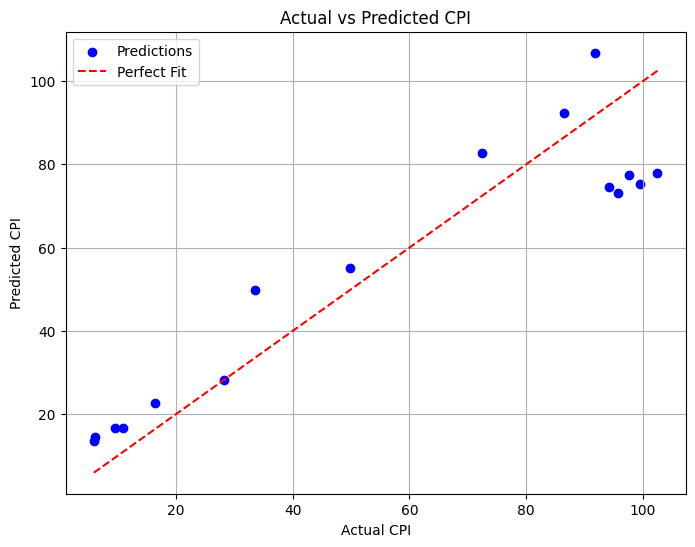

In [245]:
# 그래프 라이브러리 import
import matplotlib.pyplot as plt

# 도표 사이즈 지정 8x6
plt.figure(figsize=(8, 6))
# 점을 그리기
plt.scatter(cpi_test, cpi_prediction, color="blue", label="Predictions")  # 예측 값 파랑색
# 이상치 점선을 그린다.
plt.plot([min(cpi_test), max(cpi_test)], [min(cpi_test), max(cpi_test)], color="red", linestyle="--", label="Perfect Fit")  # 이상적 선
# x 라벨은 실제 cpi
plt.xlabel("Actual CPI")
# y 예측된 cpi
plt.ylabel("Predicted CPI")
# 제목 지정
plt.title("Actual vs Predicted CPI")
# 범례추가 (네모)
plt.legend()
# 그리드 보여주기
plt.grid(True)
# 그래프 그리기
plt.show()

## 릿지 회귀 선택 이유
1. 릿지 회귀는 선형 회귀와 비슷한 양상을 가진다.
2. 현재 데이터가 적기에 적은 데이터 양을 보여주어 데이터 특성을 0에 가깝게 만들어 예측한다 
3. 현재 3개의 변수정도가 있는데, 이 3개중에서 중요하지 않은 경우는 반영 계수를 많이 줄일 수 있다.

In [246]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 트레인 데이터 작성
exchange_train, exchange_test, cpi_train, cpi_test = train_test_split(exchange_x, cpi_y, test_size=0.2, random_state=9)

# 릿지 회귀 제작
ridge_model = Ridge(alpha=10000)
# 학습
ridge_model.fit(exchange_train, cpi_train)

# 예측
cpi_prediction_rid = ridge_model.predict(exchange_test)

# mse, mae, r2 측정
mse = mean_squared_error(cpi_test, cpi_prediction_rid)
mae = mean_absolute_error(cpi_test, cpi_prediction_rid)
r2 = r2_score(cpi_test, cpi_prediction_rid)

# 출력
print(mse, mae, r2)

# mse 를 root 
root_mse = math.sqrt(mse)

print(root_mse)

56.61022678938646 6.1728291520725485 0.8956927953301582
7.5239767935172726


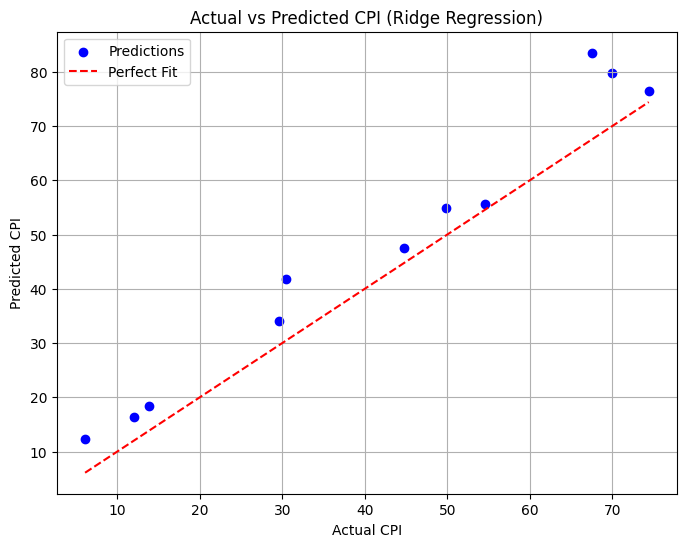

In [247]:
plt.figure(figsize=(8, 6))
plt.scatter(cpi_test, cpi_prediction_rid, color="blue", label="Predictions")  # 예측 값
plt.plot([min(cpi_test), max(cpi_test)], [min(cpi_test), max(cpi_test)], color="red", linestyle="--", label="Perfect Fit")  # 이상적 선
plt.xlabel("Actual CPI")
plt.ylabel("Predicted CPI")
plt.title("Actual vs Predicted CPI (Ridge Regression)")
plt.legend()
plt.grid(True)
plt.show()